# INFORMACIÓN:

- __AUTOR:__ Miguel Puente Ajovín y Maximiliano Greco
- __FECHA:__ Agosto-2015
- __PYTHON:__ 3.k

# INDICE

- [INFORMACIÓN:](#INFORMACIÓN:)
- [DATOS](#DATOS)
- [FILTROS](#FILTROS)
- [FILTRO-HP](#FILTRO-HP)
- [FILTRO-QT:](#FILTRO-QT:)
- [VARIABLES-AUXILIARES:](#VARIABLES-AUXILIARES:)
- [MCO](#MCO)
- [EXPORTAR:](#EXPORTAR:)
- [EVOLUCIÓN:](#EVOLUCIÓN:)
- [Gráficos](#GRÁFICOS)
- [Markdown-Sintaxis:](#Markdown-Sintaxis:)
- [REGRESIÓN:](#REGRESIÓN:)
- [Python](#Python)
- [GIT-WORK-FLOW](#GIT-WORK-FLOW)


In [2]:
# python 3, compatibilidad:
# from __future__ import division, unicode_literals, print_function, absolute_import
import os
from datetime import datetime
from numpy import *
import statsmodels.api as sm
# import scipy as sp 

import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
# import prettyplotlib as ppl

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


# Cambiamos el directorio de trabajo a la raíz

In [3]:
dir_raiz = u'/Users/mmngreco/Documents/repos/okun_ccaa/'
os.chdir(dir_raiz)
UTF = 'utf-8'

!open .

In [4]:
from def_utils import *

In [5]:
sns.set(style="white", color_codes=True)
# sns.set(style="ticks", palette="Set2")
sns.despine()
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.multi_sparse', False)

In [6]:
hoy = datetime.today()
hoy = str(hoy).replace(' ','_')

# DATOS

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)
- [GRÁFICOS](#GRÁFICOS)

In [7]:
d_tipo = 'indices'
variables = ['empleo', 'paro', 'pib']

for v in variables:
    globals()['d'+v] = pd.read_excel('data_work/indices/%s.xls' % v, index_col=0)

dparo = dparo / 100
dpib = dpib.apply(log)

In [90]:
d_tipo = 'fedea'

horas = pd.read_excel('data_work/horas_efectivas_fedea.xlsx', index_col=0)
vab = pd.read_excel('data_work/vab_fedea.xlsx', index_col=0)

In [94]:
productividad = vab / horas

In [116]:
d = productividad.apply(log)
d.dropna(inplace=True)
hp_productividad = sm.tsa.filters.hpfilter(d)[0]

In [15]:
dwork = pd.concat([dempleo, dparo, dpib], keys=variables, axis=1)

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/index.py:1428: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  "incomparable objects" % e, RuntimeWarning)


In [16]:
dwork.head()

,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib
,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
tiempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,98.962765,98.421573,100.086271,97.054294,100.475004,103.619940,98.443078,96.762971,99.329305,99.292999,99.894981,94.142675,98.027086,99.229413,101.658106,101.430164,99.224823,100.719795,0.051850,0.110725,0.026850,0.037675,0.041350,0.086175,0.035200,0.04235,0.045200,0.038325,0.036600,0.084825,0.018550,0.052425,0.050900,0.03275,0.039475,0.015025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,97.420728,97.130121,97.571897,96.249014,100.032749,105.810458,100.375781,95.414827,97.561682,97.927958,99.719317,92.185599,94.950759,95.832786,102.896965,100.234731,96.803784,98.677794,0.069425,0.125175,0.047850,0.051075,0.043575,0.098850,0.044775,0.05275,0.060225,0.061250,0.047600,0.102650,0.025400,0.082900,0.060375,0.05435,0.070925,0.026125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,96.079663,96.752329,96.367896,94.066735,101.765769,106.544630,99.809504,94.183789,93.457920,96.780255,100.332859,87.301529,93.348074,93.404236,100.046081,98.703724,94.882858,94.911045,0.086350,0.138450,0.064775,0.073400,0.048300,0.106250,0.054975,0.06725,0.076650,0.079925,0.066425,0.134850,0.034025,0.103775,0.079575,0.08420,0.093575,0.041400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dwork.tail()

,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib
,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
2011,144.840170,158.881044,128.859478,94.721236,204.872106,197.099380,133.318671,108.332675,145.624344,150.877317,152.528942,106.832279,88.431241,185.398932,183.589989,160.248891,126.366610,140.206955,0.216375,0.303875,0.170925,0.178550,0.219625,0.296900,0.152925,0.167350,0.229225,0.192500,0.244875,0.250975,0.174075,0.167300,0.254025,0.129375,0.12005,0.170050,5.380856,5.420636,5.410721,5.186451,5.542020,5.383003,5.204867,5.211802,5.436769,5.365394,5.361014,5.490693,5.182939,5.573874,5.419821,5.374410,5.165652,5.506465
2012,138.638999,150.782122,127.926351,90.326176,207.900451,190.660170,130.053488,104.048391,134.925443,142.640584,145.544883,97.102962,85.009254,180.815934,177.958311,153.645326,119.300915,132.177329,0.250275,0.345925,0.185800,0.217550,0.232625,0.330025,0.177250,0.197400,0.284750,0.226525,0.276550,0.330375,0.206650,0.189875,0.278875,0.162125,0.14880,0.204575,5.359503,5.392034,5.372631,5.151611,5.537022,5.368847,5.187422,5.181404,5.394690,5.345896,5.331192,5.455782,5.160304,5.569890,5.398511,5.347204,5.149441,5.477686
2013,134.771433,146.047580,120.648931,87.192589,209.565487,187.116418,123.527704,99.807244,132.087988,139.764620,142.945748,97.210588,81.702236,174.337720,173.793302,148.263964,115.446074,130.218169,0.263575,0.363375,0.213325,0.240375,0.223800,0.340650,0.205850,0.217375,0.301100,0.233700,0.286125,0.336950,0.220750,0.202375,0.293725,0.181000,0.15835,0.198950,5.347093,5.380569,5.365258,5.126266,5.531999,5.363742,5.164384,5.162712,5.385211,5.334432,5.323858,5.445278,5.150895,5.553793,5.385088,5.336937,5.130884,5.464037
2014,136.380682,149.608844,121.605666,88.821339,212.524767,189.453785,125.310230,100.194245,132.064553,142.651026,145.335299,101.255395,81.022947,174.215231,178.944116,150.762982,114.363813,134.114412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.360530,5.394104,5.382030,5.134786,5.550953,5.385009,5.174922,5.177281,5.396784,5.347967,5.343640,5.467211,5.156133,5.563884,5.405665,5.356355,5.143293,5.489091
2015,140.426871,156.697426,127.158924,88.158414,227.103393,198.845949,127.212617,102.006782,132.619998,144.977880,151.280662,103.025223,81.968484,183.069901,176.161344,151.679726,115.212323,135.537911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dwork.dropna(axis=0, how='any', inplace=True)

In [19]:
dwork.head()

,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib
,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
1980,93.465515,92.927827,93.771202,92.292505,98.980529,105.050183,97.611387,93.029685,90.161129,93.578697,96.685998,86.315556,90.329595,93.037726,94.555719,95.762477,92.217320,95.191726,0.114150,0.174100,0.086175,0.084075,0.080100,0.123225,0.074700,0.084500,0.106575,0.122325,0.097100,0.149875,0.050125,0.125350,0.098225,0.118700,0.123775,0.051975,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170
1981,91.058134,91.183527,90.672381,89.363463,95.049024,101.283297,95.745806,91.172635,87.228499,91.068169,92.298128,85.360899,88.163908,92.042630,91.887880,93.745358,89.228981,93.141806,0.140300,0.197950,0.117900,0.117525,0.099725,0.162275,0.103125,0.103725,0.139500,0.153950,0.133325,0.165075,0.061200,0.143525,0.125500,0.130300,0.157150,0.074525,4.603405,4.590493,4.581428,4.616324,4.640930,4.614548,4.618668,4.548802,4.566837,4.594196,4.632444,4.573974,4.617363,4.612089,4.615862,4.637196,4.619023,4.644513
1982,90.218963,91.532938,91.229616,85.607570,94.418912,99.593609,90.018992,89.390048,88.986436,88.112648,90.406271,85.194632,88.326580,93.867227,92.494977,93.677619,87.034000,90.916845,0.158450,0.205375,0.122125,0.137075,0.117450,0.182175,0.124175,0.121575,0.137325,0.191550,0.167650,0.173825,0.075200,0.145000,0.152850,0.133800,0.181650,0.109950,4.618944,4.622469,4.631229,4.633604,4.672370,4.618977,4.637838,4.586477,4.574726,4.583923,4.633836,4.580302,4.636288,4.642633,4.610550,4.625001,4.641632,4.683803
1983,89.750160,91.493362,91.115750,85.004760,96.955407,101.442928,89.204198,88.735719,89.942407,85.630517,90.698133,87.999335,88.850490,92.812809,89.627896,92.825040,86.367822,89.523369,0.173275,0.224125,0.136825,0.138950,0.139275,0.191100,0.126075,0.135575,0.140825,0.210750,0.172675,0.163475,0.098900,0.167025,0.166225,0.155175,0.196150,0.112600,4.640896,4.642989,4.666571,4.647776,4.724203,4.658208,4.665353,4.626503,4.580153,4.602279,4.653630,4.609500,4.640954,4.677328,4.630892,4.645959,4.637061,4.718461
1984,87.371813,84.647889,87.999507,82.547703,97.932792,100.274291,88.199671,86.246936,87.592835,84.971253,89.480471,76.704382,87.831342,91.364489,91.943788,90.387822,85.032712,82.969340,0.200800,0.289050,0.151900,0.156600,0.140475,0.223525,0.159850,0.159875,0.162750,0.217375,0.194900,0.265225,0.116050,0.193875,0.168600,0.162300,0.216025,0.138225,4.655462,4.652214,4.710810,4.658094,4.779183,4.624661,4.678910,4.649695,4.612773,4.623178,4.674201,4.752844,4.649545,4.688131,4.639925,4.642823,4.605555,4.741859


- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

## VARIABLES AUXILIARES:

In [21]:
regiones = dwork['empleo'].columns # variable con los nombres de las ccaa
foot = u'FUENTE: Datos obtenidos de la web: INE.es, \nElaboración propia: Maximiliano Greco, @mmngreco' 

# FILTROS

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

## FILTRO HP

In [46]:
#for i in range(5):

id_x = 1  
#               0         1        2  # variable a filtrar
variables = ['empleo', 'paro', 'pib']

print('{:^60}'.format('FILTRO HP'))
print('HOJA %s' % d_tipo)

data = dwork.copy()

for v in variables:
    d = data[v].dropna(axis=0, how='all')
    d = d.iloc[:]

    ciclo, tendencia = sm.tsa.filters.hpfilter(d)
    globals()['hp_%s' % v] = ciclo # variable output
    print('Variable sin tendencia HP creada: %s' % ('hp_%s' % v))
    print(ciclo.head(2).ix[:,:2])
    print(ciclo.tail(2).ix[:,:2])
    print('')

                         FILTRO HP                          
HOJA hp-filter
Variable sin tendencia HP creada: hp_empleo
        España  Andalucía
1980  9.749476  10.908162
1981  6.001890   7.321642
         España  Andalucía
2012 -13.964312 -18.924062
2013 -19.875606 -26.092618

Variable sin tendencia HP creada: hp_paro
        España  Andalucía
1980 -0.057198  -0.065870
1981 -0.032784  -0.046333
        España  Andalucía
2012  0.071530   0.091395
2013  0.080664   0.105137

Variable sin tendencia HP creada: hp_pib
        España  Andalucía
1980  0.037168   0.037914
1981  0.006199  -0.008789
        España  Andalucía
2012 -0.080315  -0.095502
2013 -0.113655  -0.127797



In [47]:
hps = crear_df([hp_empleo, hp_paro, hp_pib])

In [48]:
x = 'paro'
y = 'pib'
s, b, m = estimar_mco(hps, 
                      endogena=y, 
                      exogena=x, 
                      regiones=regiones)

res = resumen_mco(b, 0)
res['sig'] = res['pv_b1'] < 0.05
res.ix[:,2:].sort_index()

,b1,pv_b1,R2,sig
Andalucía,-0.733269,8.793503e-12,0.771390,True
Aragón,-0.825737,1.652166e-07,0.580554,True
"Asturias, Principado de",-0.673005,5.742586e-06,0.479227,True
"Balears, Illes",-0.696296,1.538186e-06,0.519306,True
Canarias,-0.713850,5.447421e-11,0.744056,True
Cantabria,-0.918157,4.198093e-09,0.665285,True
Castilla - La Mancha,-0.875911,2.426696e-06,0.505778,True
Castilla y León,-0.603721,2.913676e-05,0.425488,True
Cataluña,-0.979750,9.877671e-16,0.870051,True
Comunitat Valenciana,-0.976168,6.587528e-16,0.873287,True


In [25]:
#hps.to_csv('data_work/filtrado/max/hp_data.csv')

# FILTRO QT:

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

In [55]:
variables

['empleo', 'paro', 'pib']

In [56]:

for i in range(3):
    id_v = i
    v = variables[id_v]

    d = dwork[v]
#    d = data[v].dropna(how='all', axis=0)
#    d = d.iloc[:2005 - d.index.min()]

    globals()['qt_%s' % v] = sm.tsa.tsatools.detrend(d, order=2, axis=0)
    df = globals()['qt_%s' % v]

    globals()['qt_%s' % v] = DataFrame(df, index=d.index, columns=d.columns)
    print('Variable sin tendencia creada: qt_%s' % v)

    df = globals()['qt_%s' % v]


Variable sin tendencia creada: qt_empleo
Variable sin tendencia creada: qt_paro
Variable sin tendencia creada: qt_pib


In [57]:
qts = crear_df([qt_empleo, qt_paro, qt_pib])
qts.head(2)

Variables,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib
Regiones,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
1980,9.469620,11.356731,6.635463,4.710899,11.247371,19.182266,8.257627,5.329412,4.519214,13.171538,14.218189,5.939221,0.748556,8.396430,12.631791,10.358280,10.175851,9.774994,-0.074129,-0.078288,-0.070788,-0.066791,-0.066940,-0.11194,-0.059240,-0.055907,-0.059861,-0.094450,-0.090996,-0.061826,-0.033464,-0.057369,-0.081004,-0.062716,-0.076935,-0.079231,0.064865,0.072920,0.045465,0.023703,0.033775,0.085100,0.047243,0.058773,0.081509,0.106688,0.059915,0.052353,0.033226,0.044989,0.071256,0.051404,0.044316,0.040982
1981,5.809931,7.701227,2.807660,2.766801,5.599840,11.876366,6.674252,3.490160,0.912790,8.613390,7.779251,4.543193,-0.460619,5.731412,7.643783,6.487976,6.151980,7.493203,-0.045703,-0.055805,-0.033444,-0.035328,-0.040861,-0.06642,-0.035302,-0.039095,-0.022254,-0.054307,-0.050423,-0.050719,-0.028542,-0.034630,-0.051378,-0.042602,-0.043206,-0.053056,0.027591,0.018302,-0.015303,0.006339,0.013981,0.054339,0.031669,-0.028382,0.008458,0.055945,0.050704,-0.024361,0.026858,0.012097,0.050569,0.052609,0.040639,0.035636


In [58]:
x = 'paro'
y = 'pib'

s, b, m = estimar_mco(qts, 
                      endogena=y, 
                      exogena=x, 
                      regiones=regiones)

res = resumen_mco(b, 0)
res['sig'] = res['pv_b1'] < 0.05
res.ix[:,2:].sort_index()

,b1,pv_b1,R2,sig
Andalucía,-0.696537,1.866433e-14,0.843988,True
Aragón,-0.739129,2.109725e-07,0.574229,True
"Asturias, Principado de",-0.622985,8.693528e-07,0.535740,True
"Balears, Illes",-0.536509,8.962328e-11,0.736049,True
Canarias,-0.669863,2.165038e-12,0.790415,True
Cantabria,-0.925254,7.590385e-12,0.773465,True
Castilla - La Mancha,-0.783539,7.203901e-06,0.472019,True
Castilla y León,-0.562315,2.068984e-06,0.510550,True
Cataluña,-0.967668,5.534263e-17,0.891394,True
Comunitat Valenciana,-0.950541,2.287593e-17,0.897209,True


In [29]:
#qts.to_csv('data_work/filtrado/max/qt_data.csv')

# MCO

# RESUMEN

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

In [30]:
y = 'pib'

In [31]:
data = crear_df([hp_empleo, hp_paro, hp_pib])
x = 'paro'
s, p, m = estimar_mco(data, exogena=x, endogena=y, regiones=regiones)
print(d_tipo)
resumen_mco(p, 1)

indices


,$β_0$,$pv_{β_0}$,$β_1$,$pv_{β_1}$,$R^2$
Extremadura,-8.222019e-13,1,-0.380801,1.334180e-02,0.176600
"Rioja, La",-6.063774e-13,1,-0.780317,6.250851e-05,0.398500
Castilla y León,-9.924563e-13,1,-0.603721,2.913676e-05,0.425488
"Asturias, Principado de",-7.952241e-13,1,-0.673005,5.742586e-06,0.479227
Castilla - La Mancha,-7.756890e-13,1,-0.875911,2.426696e-06,0.505778
"Balears, Illes",-6.399551e-13,1,-0.696296,1.538186e-06,0.519306
Aragón,-6.435625e-13,1,-0.825737,1.652166e-07,0.580554
Cantabria,-1.049152e-12,1,-0.918157,4.198093e-09,0.665285
"Navarra, Comunidad Foral de",-8.225473e-13,1,-1.339463,6.799825e-11,0.740520
Canarias,-5.221891e-13,1,-0.713850,5.447421e-11,0.744056


# EXPORTAR:

In [43]:
# guardar_mco(sumrz_paro, 'modelos_u')

# guardar_mco(sumrz_empleo, 'modelos_l')

In [45]:
hps.head()

Variables,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib
Regiones,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
1980,9.749476,10.908162,7.396422,7.137203,14.958039,16.220484,11.191608,6.240390,6.501349,12.048460,12.791160,5.829455,2.560517,10.601136,12.984344,10.042171,9.655221,11.979132,-0.057198,-0.065870,-0.048326,-0.060606,-0.038997,-0.077002,-0.060230,-0.051650,-0.034379,-0.067311,-0.065907,-0.056426,-0.035878,-0.040658,-0.058908,-0.037978,-0.073914,-0.059340,0.037168,0.037914,0.017202,-0.002250,-0.030038,0.045593,0.019499,0.032072,0.064792,0.068810,0.025513,0.013177,0.030031,0.021886,0.054599,0.032797,0.040331,-0.002204
1981,6.001890,7.321642,3.368380,4.620609,8.415928,9.589542,8.922151,4.184189,2.376687,7.748380,6.654347,4.453050,0.896570,7.375063,7.854236,6.245353,5.766756,9.177119,-0.032784,-0.046333,-0.016261,-0.030677,-0.019476,-0.039866,-0.036141,-0.035910,-0.002524,-0.033665,-0.031238,-0.046637,-0.030354,-0.021809,-0.034435,-0.023784,-0.041129,-0.037994,0.006199,-0.008789,-0.037357,-0.014001,-0.035360,0.024078,0.010228,-0.049168,-0.004511,0.027050,0.024088,-0.054999,0.024350,-0.005958,0.037714,0.038227,0.037576,0.002386
1982,3.816419,5.822016,2.991771,1.272704,5.165860,5.025660,2.784465,2.198551,2.938529,2.995777,3.005551,3.861393,1.559381,6.962058,5.990948,4.391640,2.665613,6.192579,-0.016334,-0.043180,-0.011667,-0.014610,-0.001832,-0.021831,-0.019389,-0.021513,-0.005747,0.005997,0.001573,-0.043263,-0.021882,-0.019635,-0.009849,-0.017667,-0.017173,-0.003736,-0.007489,-0.008862,-0.018386,-0.019624,-0.044983,-0.002414,0.006616,-0.036384,-0.027632,-0.014052,-0.003236,-0.085659,0.025382,-0.010191,0.004791,-0.000585,0.043553,0.006925
1983,1.985379,3.915192,1.932710,1.066073,5.058441,3.974515,1.539234,1.330755,2.688793,-1.303340,1.520328,6.230635,2.579670,3.652177,0.632344,1.736630,1.077601,4.018814,-0.003117,-0.028591,0.003473,-0.016123,0.019974,-0.014650,-0.021689,-0.010879,-0.003251,0.027365,0.005185,-0.058889,-0.003647,0.003153,0.000856,0.006388,-0.003099,-0.002155,-0.014814,-0.020433,-0.013870,-0.028343,-0.034153,0.005824,0.011320,-0.021259,-0.053294,-0.026628,-0.012203,-0.093431,0.012103,-0.010296,-0.002569,-0.006309,0.022275,0.006833
1984,-1.783373,-4.830773,-2.148676,-1.014759,3.350118,-0.140127,0.070393,-1.389800,-0.883484,-3.813739,-1.508600,-5.518688,2.050005,-0.085054,0.418805,-2.532399,-1.206321,-3.353306,0.022958,0.032381,0.019107,-0.001700,0.021253,0.016239,0.008056,0.010210,0.017742,0.036322,0.026159,0.037776,0.008157,0.030882,0.000721,0.016305,0.016551,0.022562,-0.029598,-0.043354,-0.000433,-0.040882,-0.020048,-0.058829,0.002011,-0.022943,-0.051861,-0.036814,-0.020471,0.013041,0.002646,-0.034321,-0.021391,-0.036235,-0.026087,-0.004522


# EVOLUCIÓN:

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

In [60]:
d_tipo = 'qt-filter'
data = qts

desde = data.index.min()
hasta = desde + 10
fin = data.index.max()

id_x = 0 

x = 'paro'
y = 'pib'

print('VARIABLE:', y.upper(), '~', x.upper())
print('ESTIMACIÓN:\n    Desde:\t%s\n    Hasta:\t%s\n    Fin:\t%s\nAñadiendo un año más a la muestra.' % (desde, hasta, fin))

b0_evolucion = DataFrame(columns=regiones)
b1_evolucion = DataFrame(columns=regiones)
# umbral_evolucion = DataFrame(columns=regiones)


while hasta <= fin:
    s, p, m = estimar_mco(data.iloc[hasta - desde - 10 :hasta - desde + 1], 
                          endogena=y, 
                          exogena=x, 
                          regiones=regiones)

    b0_evolucion.loc[hasta] = resumen_mco(p, 0).b0.T
    b1_evolucion.loc[hasta] = resumen_mco(p, 0).b1.T

    if hasta == 2004: 
        print('MCO 2004:\n')
        print(resumen_mco(p, 0)[['b0', 'b1']])

    hasta += 1

evolucion_okun = crear_df([b0_evolucion, b1_evolucion], keys=['b0', 'b1'])
evolucion_okun.head()

VARIABLE: PIB ~ PARO
ESTIMACIÓN:
    Desde:	1980
    Hasta:	1990
    Fin:	2013
Añadiendo un año más a la muestra.
MCO 2004:

                                   b0        b1
Castilla y León             -0.014727 -0.407792
Galicia                     -0.005953 -0.607269
Rioja, La                   -0.010163 -0.472505
Aragón                      -0.020858 -0.529808
Extremadura                 -0.027493 -0.440308
Asturias, Principado de     -0.021228 -0.536355
Castilla - La Mancha        -0.028661 -0.508692
Cataluña                    -0.002173 -0.680499
Balears, Illes              -0.008220 -0.642790
Canarias                    -0.013259 -0.720154
Cantabria                   -0.005176 -0.845169
Murcia, Región de           -0.010940 -0.865290
Andalucía                   -0.012874 -0.676948
Navarra, Comunidad Foral de -0.018381 -1.444603
Madrid, Comunidad de        -0.011286 -0.852412
País Vasco                  -0.008763 -1.135922
España                      -0.010674 -0.742039
Comunitat V

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Variables,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1
Regiones,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
1990,0.003225,0.004600,0.006743,0.007988,0.002734,0.002973,0.005212,0.007390,0.003122,-0.002184,0.002087,0.011839,-0.003970,0.008390,0.002724,0.010838,0.004193,-0.007242,-0.752033,-0.513786,-0.413154,0.118576,-0.330849,-0.724127,-0.753664,-0.095964,-0.936090,-1.114630,-0.751412,0.607407,-1.265970,-0.593885,-0.899036,-0.829192,-0.826940,-0.667370
1991,0.003541,0.003482,0.007299,0.004521,0.002423,0.003410,0.004613,0.001229,0.006230,-0.003084,0.005235,0.006197,-0.004040,0.008432,0.003760,0.013233,0.009278,-0.002117,-0.701721,-0.356657,-0.337090,0.400631,-0.187647,-0.685663,-0.766409,0.476594,-0.350890,-1.071845,-0.918052,0.934495,-1.320148,-0.585223,-0.941884,-0.940178,-1.182178,-0.760554
1992,0.005557,0.004901,0.013198,0.003169,0.001085,0.001880,0.003452,0.002325,0.009227,-0.003407,0.005708,0.003891,-0.000996,0.007769,0.004158,0.010287,0.013735,0.001584,-0.805880,-0.385001,-0.656745,0.552649,-0.081054,-0.590134,-0.747169,0.222067,0.012815,-1.060849,-0.855075,1.022791,-1.063970,-0.625184,-0.885073,-0.924167,-1.553855,-0.639238
1993,0.010201,0.009637,0.019627,0.003032,0.006911,0.002698,0.001867,0.009313,0.016771,-0.003077,0.005921,0.006846,-0.002358,0.008619,0.005070,0.021322,0.011687,-0.001580,-1.001196,-0.660264,-0.958469,0.228692,-0.505506,-0.566309,-0.860545,-0.341335,-0.776661,-0.970278,-0.882251,0.589205,-0.770211,-0.915324,-0.837528,-1.585952,-1.407003,-0.491913
1994,0.014157,0.024822,0.023880,0.012673,0.009095,0.001099,0.000209,0.016969,0.032328,-0.004042,0.007516,0.060618,-0.004865,0.009836,0.006175,0.028303,0.008754,-0.005873,-1.036538,-1.054680,-1.044371,-0.359954,-0.600086,-0.538760,-0.746238,-0.649957,-1.351729,-0.809830,-0.921807,-1.211578,-0.547960,-1.013065,-0.838977,-1.865031,-1.274749,-0.364174


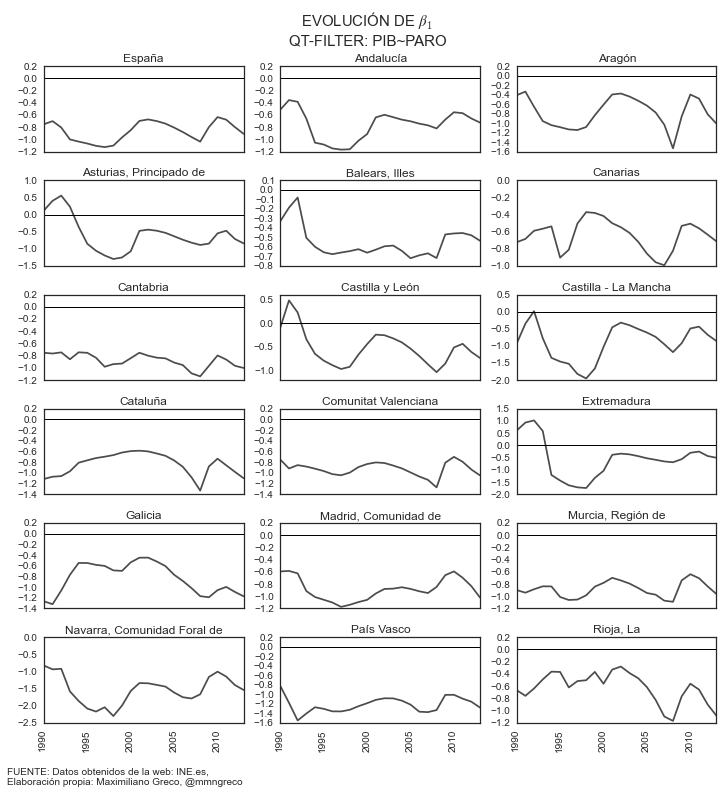

In [74]:
fig = plt.figure(figsize=(10,10))
x = 'paro'
y = 'pib'
p = 'b1'

ttl= 'EVOLUCIÓN DE $β_%s$\n%s: %s~%s' % (p[-1],d_tipo.upper(), y.upper(), x.upper())
file_name = 'evolucion_%s_%s_%s_%s.png' % (d_tipo, y, p, hoy)

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(6,3,i+1)
    plt.axhline(y=0, color='black', linewidth=1)
    evolucion_okun[p][reg].plot(ax=ax, label=reg, sharex=True, color='black', alpha=0.7)
    plt.title(reg)
    plt.xticks(evolucion_okun.index[::5], evolucion_okun.index[::5], rotation=90)
    plt.xlim(evolucion_okun.index.min(), evolucion_okun.index.max())

plt.gcf().text(0, -0.03, "%s" % foot, fontsize=10, transform=(1,1))
plt.suptitle(x=0.5, y=1.05, t=ttl, fontsize=15)
plt.tight_layout()
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

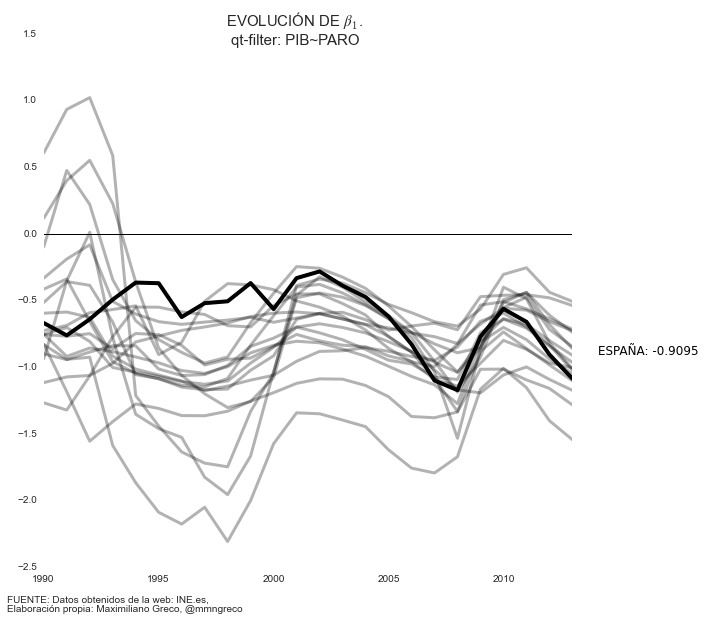

In [75]:
fig = plt.figure(figsize=(8,8), dpi=200)
ttl= 'EVOLUCIÓN DE $β_%s$.\n%s: %s~%s' % (p[-1],d_tipo, y.upper(), x.upper())
file_name = 'evolucion_%s_%s_%s_%s_todas.png' % (d_tipo, y, p, hoy)

c = '#' + '000000'
c1 = '#' + '000000'

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(111)
    plt.axhline(y=0, color='black', linewidth=1)
    evolucion_okun[p][reg].plot(ax=ax, label=reg, alpha=0.3, linewidth=3, color=c1)

evolucion_okun[p][reg].plot(ax=ax, label=reg, alpha=1, color=c, linewidth=4)

plt.xticks(evolucion_okun.index[::5])
plt.xlim(evolucion_okun.index.min(), evolucion_okun.index.max())

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.axes.get_xaxis().set_visible(True)
ax.axes.get_yaxis().set_visible(True)

ax.tick_params(axis='both',
               which='both',
               bottom='off',
               top='off',
               left='off',
               labelbottom='on',
               labelleft='on')

plt.text(2014.1, 
         evolucion_okun[p]['España'].values[-1], 
         'ESPAÑA: {:.4f}'.format(evolucion_okun[p]['España'].values[-1]),
         fontsize=12,
         family='bold',
         color=c)



plt.gcf().text(0, 
               -0.03, 
               "%s" % foot, 
               fontsize=10, 
               transform=(1,1))

plt.suptitle(x=0.5, y=1.02, t=ttl, fontsize=15)

plt.tight_layout()
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=200)


In [85]:
d = evolucion_okun.b1['España'].loc[2005:]
d
#d[d == d.max()]

2005   -0.807432
2006   -0.880189
2007   -0.961223
2008   -1.037815
2009   -0.800327
2010   -0.635290
2011   -0.677711
2012   -0.799268
2013   -0.909468
Name: España, dtype: float64

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

# GRÁFICOS

In [49]:
# con matplotlib
# fig = plt.figure(figsize=(15,15))
# data.du.boxplot(rot=90, ax=fig.add_subplot(311))
# data.dl.boxplot(rot=90, ax=fig.add_subplot(312))
# data.dy.boxplot(rot=90, ax=fig.add_subplot(313))

# plt.tight_layout()

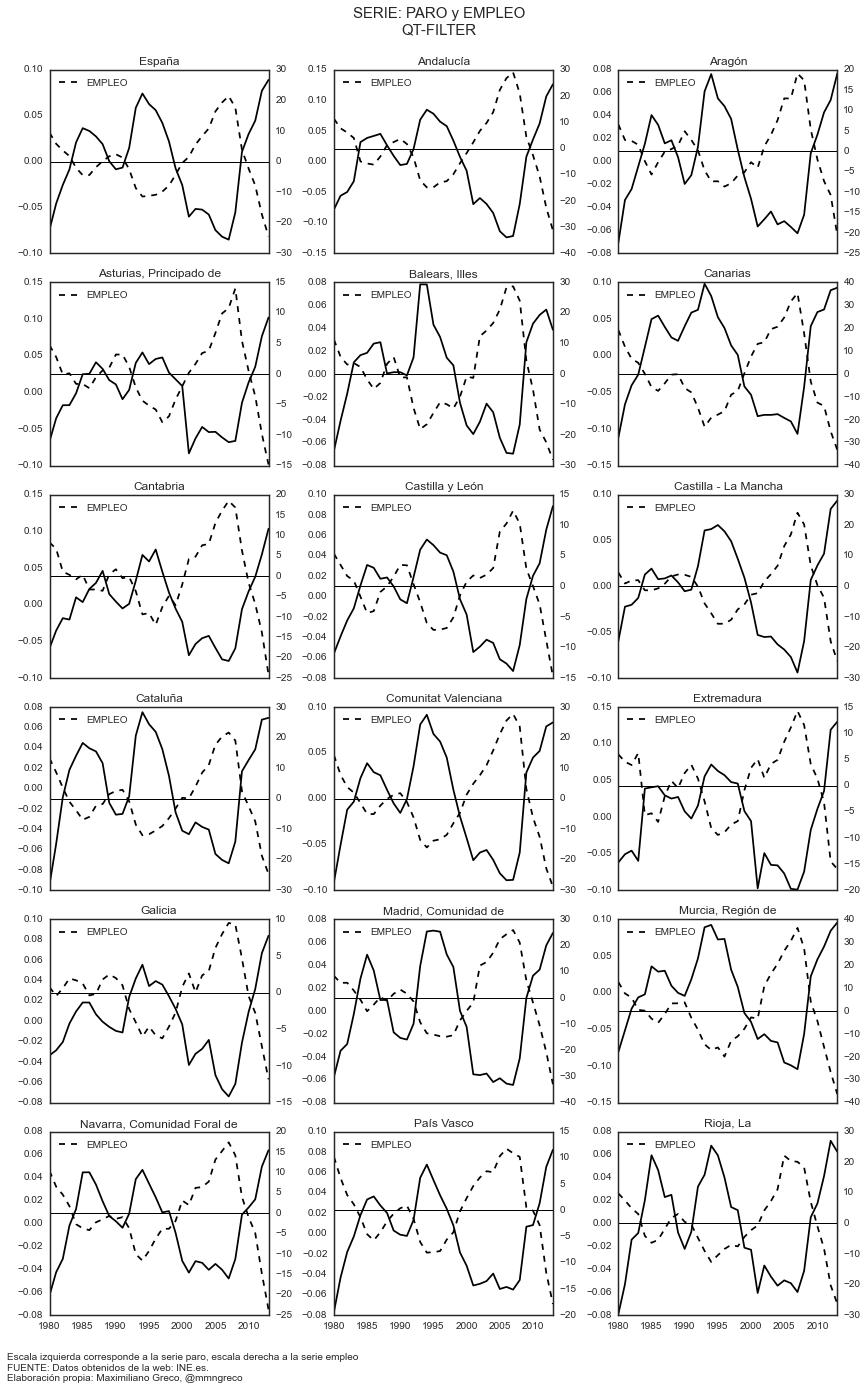

In [228]:
# PARAMETROS DEL GRÁFICO
id_x = 0
data = qts
d_tipo = 'qt-filter'
x = ['paro', 'empleo']
foot1 = '''Escala izquierda corresponde a la serie %s, escala derecha a la serie %s
FUENTE: Datos obtenidos de la web: INE.es.
Elaboración propia: Maximiliano Greco, @mmngreco''' % (variables[1], variables[0])

c = 'black'
ttl = 'SERIE: %s y %s\n%s' % (x[0].upper(), x[1].upper(), d_tipo.upper())
file_name = 'serie_%s_%s_%s_%s.png' % (x[0], x[1], d_tipo.upper(), hoy)

######## 

fig = plt.figure(figsize=(12,18))

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
    data[x[0]][reg].plot(ax=ax, label=x[0].upper(), color=c, sharex=True)
    data[x[1]][reg].plot(ax=ax, linestyle='--', label=x[1].upper(), secondary_y=True, color=c, sharex=True)
    plt.axhline(y=0, color='black', linewidth=1, axes=ax)
    plt.title(reg)
    plt.legend(loc='upper left')

plt.gcf().text(0, -0.03, "%s" % foot1, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.suptitle(t=ttl, fontsize=15, x=0.5, y=1.03)
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=200)

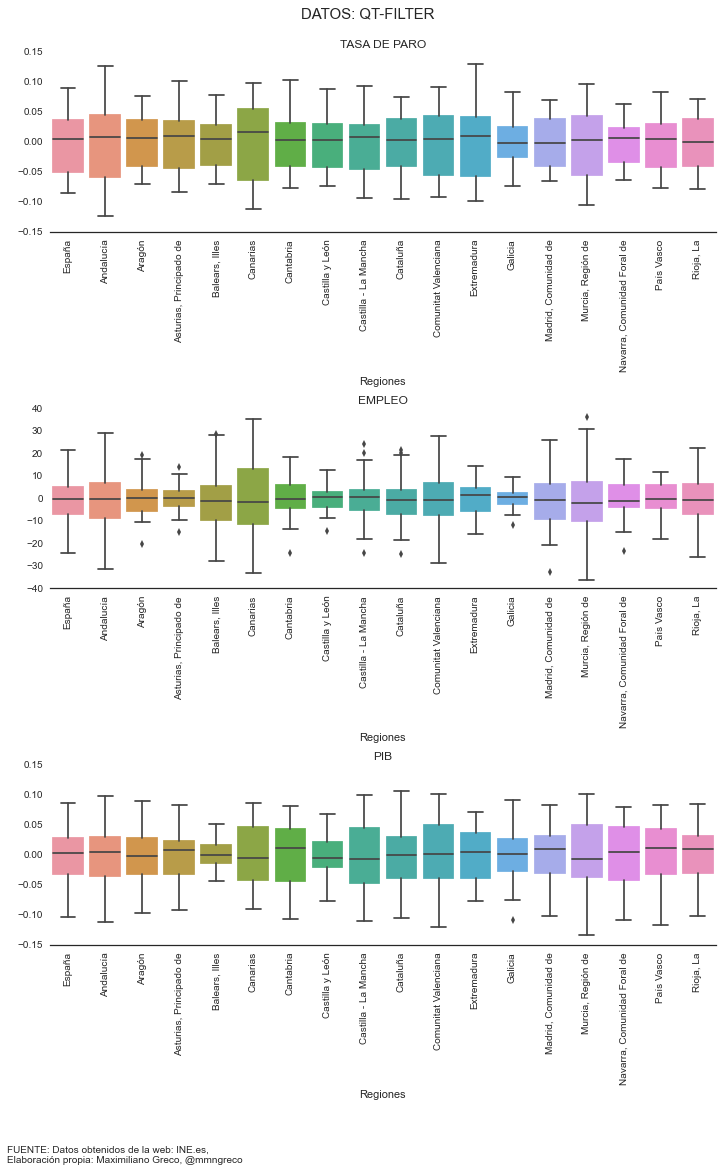

In [229]:
# i = id_xls
ttl = 'DATOS: %s' % (d_tipo.upper())
file_name = 'boxplot_%s_%s.png' % (d_tipo.upper(), hoy)


# con seaborn
fig = plt.figure(figsize=(10,15))
sns.set_palette('Greys')

g1 = sns.boxplot(data=data.paro, fliersize=5, width=.8, ax=fig.add_subplot(311))
g1.set_xticklabels(data.paro.columns, rotation=90)
g1.set_title('TASA DE PARO')

g2 = sns.boxplot(data=data.empleo, fliersize=5, width=.8, ax=fig.add_subplot(312))
g2.set_xticklabels(data.empleo.columns, rotation=90)
g2.set_title('EMPLEO')

g3 = sns.boxplot(data=data.pib, fliersize=5, width=.8, ax=fig.add_subplot(313))
g3.set_xticklabels(data.pib.columns, rotation=90)
g3.set_title('PIB')

sns.despine(left=True)

plt.suptitle(x=0.5, y=1.02, t=ttl, fontsize=15)
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()

plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

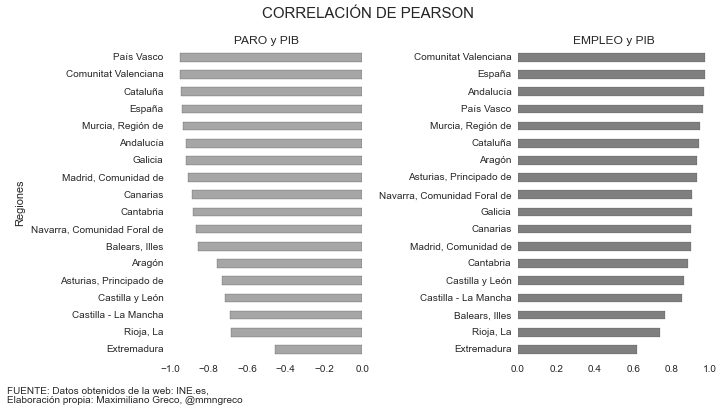

In [230]:
ttl = 'CORRELACIÓN DE PEARSON\n%s' % d_tipo.upper()
file_name = 'corr_%s_%s.png' % (d_tipo.upper(), hoy)

x = ['paro', 'empleo']
y = 'pib'

# ----------------------------

plt.figure(figsize=(10,5))

axs = [plt.subplot(121)]
data[x[0]].corrwith(data[y], axis=0).order(ascending=False).plot(kind='barh', color='grey', alpha=0.7)
plt.gca().set_title('%s y %s' % (x[0].upper(), y.upper()))

axs += [plt.subplot(122)]
data[x[1]].corrwith(data[y], axis=0).order(ascending=True).plot(kind='barh', color='black', alpha=0.5)
plt.gca().set_title('%s y %s' % (x[1].upper(), y.upper()))

plt.suptitle('CORRELACIÓN DE PEARSON', fontsize=15, x=0.5, y=1.05)

# Quitar las líneas del marco del eje.

for i, ax in enumerate(axs):
    if i == 1:
        ax.axes.get_yaxis().set_visible(True)
        ax.tick_params(labelleft='off')
        plt.ylabel('')
        ax.yaxis.tick_right()
    else:
        ax.axes.get_yaxis().set_visible(True)

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)  

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    ax.axes.get_xaxis().set_visible(True)

    ax.tick_params(axis='both',
                   which='both',
                   bottom='off',
                   top='off',
                   left='off',
                   labelbottom='on')

    
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

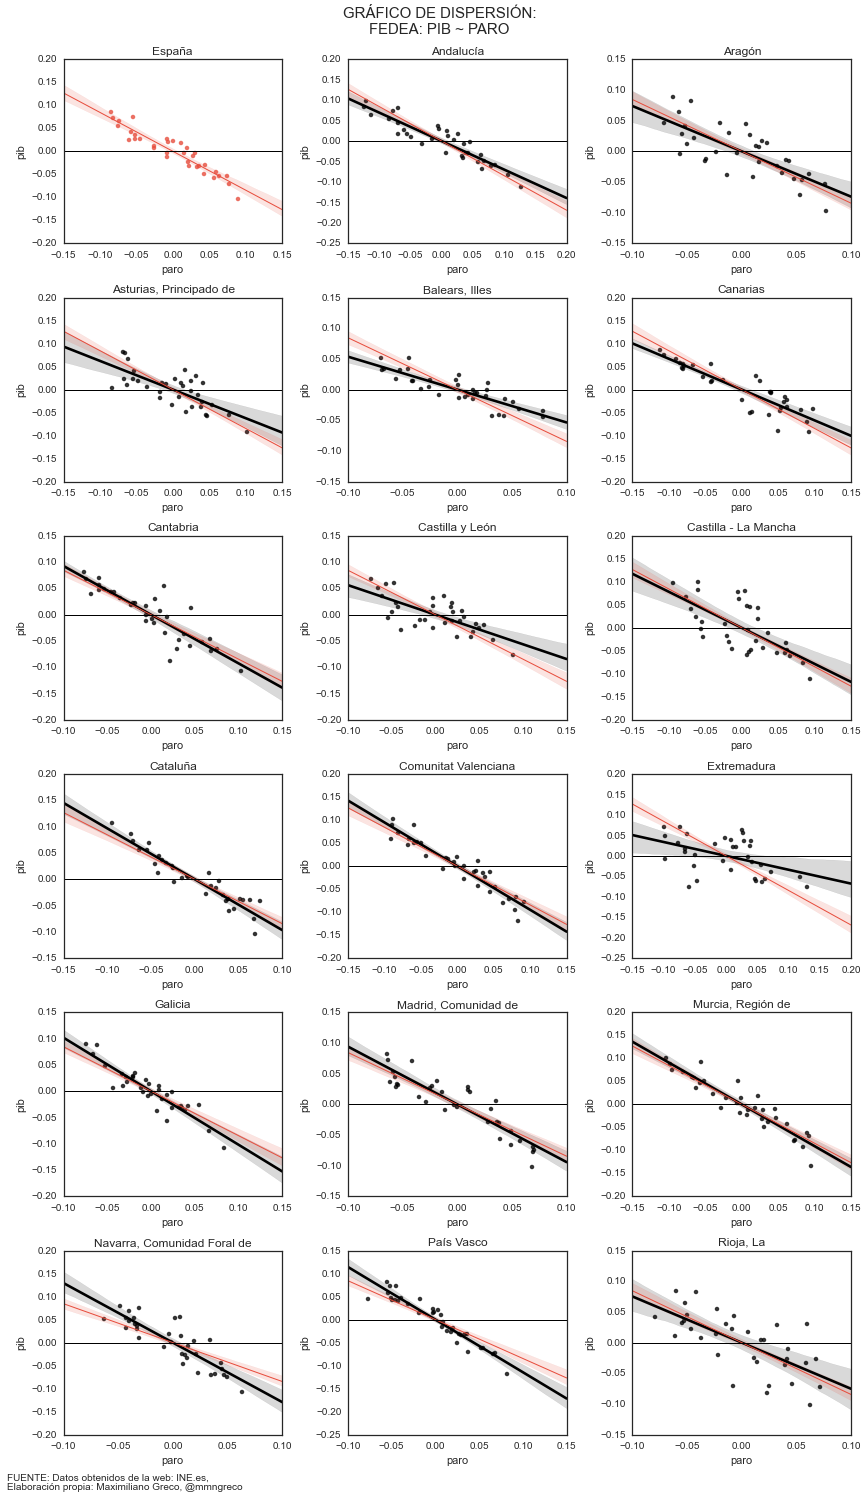

In [95]:
# PARAMETROS DEL GRÁFICO
id_x = 0
x = ['paro', 'empleo']
y = 'pib'

ttl = 'GRÁFICO DE DISPERSIÓN: \n%s: %s ~ %s' % (d_tipo.upper(), y.upper(), x[id_x].upper())
file_name = 'reg%s_%s_%s_%s.png' % (x[id_x].upper(), y.upper(), d_tipo, hoy)


######## 

fig = plt.figure(figsize=(12,20))

for i, reg in enumerate(regiones):
    if reg == 'España':
        ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
        g = sns.regplot(y=data[y][reg], x=data[x[id_x]][reg], ax=ax, color="#e74c3c", line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)

    else:
        ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
        g = sns.regplot(y=data[y][reg], x=data[x[id_x]][reg], ax=ax, color='black')
        sns.regplot(y=data[y]['España'], 
                    x=data[x[id_x]]['España'], 
                    ax=ax, 
                    color="#e74c3c", 
                    scatter=False, 
                    line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)
    g.set_xlabel(x[id_x])
    g.set_ylabel(y)
    g.set_title(reg)

plt.gcf().text(0, -0.01, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.suptitle(t=ttl, fontsize=15, x=0.5, y=1.02)

plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

In [122]:
hp_productividad.head()

,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
1980,-0.078996,-0.079871,-0.063634,-0.093496,-0.188299,-0.100374,-0.097249,-0.069149,-0.051362,-0.088173,-0.092975,-0.073477,-0.046595,-0.059734,-0.054505,-0.039555,-0.073169,-0.166377
1981,-0.066959,-0.086777,-0.068347,-0.099552,-0.145298,-0.085134,-0.068129,-0.094844,-0.072190,-0.066977,-0.056461,-0.123226,-0.008213,-0.036549,-0.118414,-0.011192,-0.051055,0.031186
1982,-0.061866,-0.078683,-0.074182,-0.031675,-0.092871,-0.103719,-0.063801,-0.055718,-0.100442,-0.053216,-0.035786,-0.102995,-0.036798,-0.067389,-0.061355,-0.047129,-0.045051,0.007292
1983,-0.045724,-0.040725,-0.043439,-0.079846,-0.041885,-0.046347,-0.064135,-0.058152,-0.090036,-0.051728,-0.014521,-0.094369,-0.057712,-0.030443,-0.056539,-0.035499,-0.036588,0.059582
1984,-0.006926,0.000540,0.005592,-0.055608,-0.043536,-0.002673,-0.022859,0.010470,-0.033284,-0.015093,0.034375,0.047344,-0.022669,0.003514,-0.044028,-0.010674,-0.029578,0.072000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c1fd630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12cf09198>]], dtype=object)

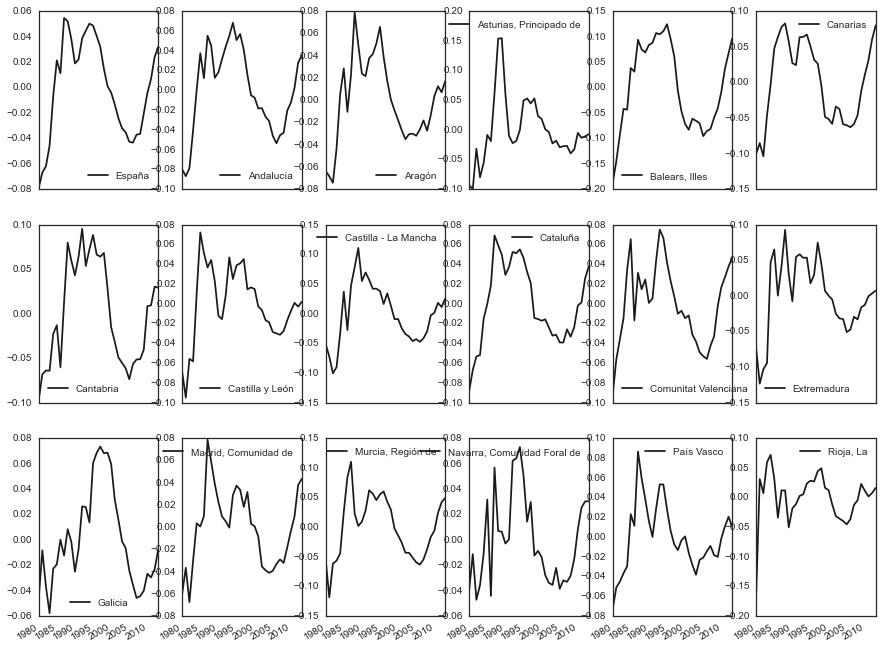

In [124]:
hp_productividad.plot(subplots=True, figsize=(15,12), layout=(3,6))

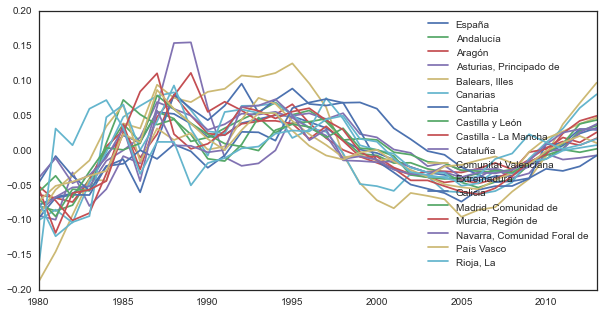

In [128]:
hp_productividad.plot(figsize=(10,5))

# BIBLIOGRAFÍA:

- [Estadisticas Robustas](link1)
- [Correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)
- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)
- [Criterio de Outliers](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico)


[link1]:https://en.wikipedia.org/wiki/Robust_statistics#Definition

# TEORÍA

- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)


# Apéndice:

# Markdown Sintaxis:
- [Footnote](http://rephrase.net/box/word/footnotes/syntax/)
- [Sintaxis, guía](http://daringfireball.net/projects/markdown/syntax#link)

![](http://cdn.churchm.ag/wp-content/uploads/2014/01/markdown-cheatsheet.png)

# REGRESIÓN:

Método de estimación:
- MCO

## Statsmodels:
- [Get Started](http://statsmodels.sourceforge.net/devel/gettingstarted.html)
- [Regression](http://statsmodels.sourceforge.net/devel/regression.html)
- [QT-filter](http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.tsatools.detrend.html?highlight=trend#statsmodels.tsa.tsatools.detrend)
- [HP-filter](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_filters.html?highlight=trend)

## Linear Regresion
- Linear Regression: [link](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)
- HP filter: [link](http://link.springer.com/article/10.1007%2FBF01205950)
- Patsy Formula: [link](https://patsy.readthedocs.org/en/latest/formulas.html)

# Python

- [format](https://mkaz.com/2012/10/10/python-string-format/)

In [71]:
!open imgs

In [9]:
!subl3 .

In [32]:
def crea_link_md(texto, *texto_enlace):
    '''
    Crea enlace local con formato markdown para un string, o lista de string.
    '''
    if len(texto_enlace) > 0:
        texto_enlace = texto_enlace[0]
        if isinstance(texto, str):
            t = texto.replace(' ', '-')
            link = '[{}](#{})'.format(texto_enlace, t)
            print(t)
            print(link)
    #        return t, link
        elif isinstance(texto, list) and len(texto) == len(texto_enlace):
            ret = dict()
            for i, t in enumerate(texto):
                link = '[{}](#{})'.format(texto_enlace[i], t.replace(' ', '-'))
                ret[t] = link
            for k, v in ret.items():
                print(k)
                print(v)
    #        return ret
        else:
            print(len(texto) == len(texto_enlace), '{} != {}\n{}\t{}'.format(len(texto), len(texto_enlace), texto, texto_enlace))
    else:

        if isinstance(texto, str):
            t = texto.replace(' ', '-')
            link = '[](#{})'.format(t)
            print(t)
            print(link)
    #        return t, link
        elif isinstance(texto, list):
            ret = dict()
            for t in texto:
                link = '[](#{})'.format(t.replace(' ', '-'))
                ret[t] = link
            for k, v in ret.items():
                print(k)
                print(v)
    #        return ret




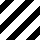
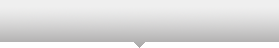
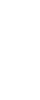
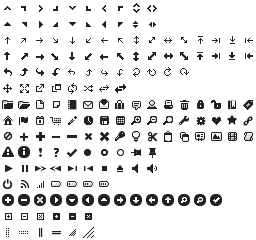
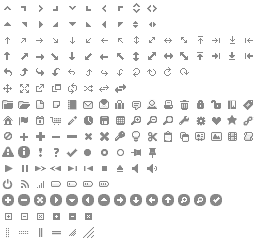
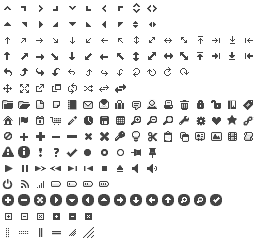
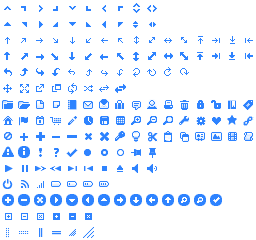
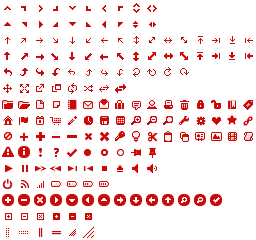
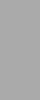
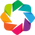
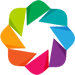
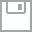
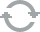
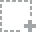
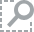
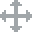
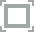
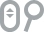

NameError: name 'ppl' is not defined

In [17]:
import bokeh.plotting as bkh
from bokeh import mpl

bkh.output_notebook()

ppl.plot(dwork.empleo, linewidth=3)
plt.xticks(dwork.index)
plt.legend(loc='upper left')
bkh.show(mpl.to_bokeh())

http://bokeh.pydata.org/en/latest/docs/reference/charts.html%23bokeh-charts

# GIT WORK-FLOW

In [15]:
datetime.now()

datetime.datetime(2015, 9, 16, 11, 39, 55, 953941)

In [16]:
%%!
git add .
git commit -a -m 'update 9.16.1139'
git push origin master

['[master c10ba2a] update 9.16.1139',
 ' 7 files changed, 740 insertions(+), 44 deletions(-)',
 ' create mode 100644 data_work/horas_efectivas_fedea.xlsx',
 ' create mode 100644 data_work/vab_fedea.xlsx',
 ' create mode 100644 imgs/regPARO_PIB_fedea_2015-09-16_10:12:16.977144.png',
 'To https://github.com/mmngreco/okun_ccaa.git',
 '   a73e29a..c10ba2a  master -> master']

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)